# Project  on Fixer.io to find out the Currency Exchnage Pattern for EURO, INR and GBP

In [1]:
import os 
import urllib.request
import csv
import pandas as pd 
import requests
import datetime
from datetime import timedelta
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Task 1: Identify one or more suitable web APIs

## API chosen:

A single API was chosen for this assignment that was provided by 
https://fixer.io/

It gives the real time exchange rate for available currencies
It has 1000 api calls and the data is hourly updated

The API key I recieved is  
e19104f18048dfe3e16b24c9a1ec9015



In [2]:
api_key = "e19104f18048dfe3e16b24c9a1ec9015"

# Task 2: Collect data your chosen API(s)

Collecting the Raw data from api which is in jason format and we need to import it to python format 

Base URL is http://data.fixer.io/api/latest?access_key=e19104f18048dfe3e16b24c9a1ec9015



In [3]:
Base_url = "http://data.fixer.io/api/latest?access_key=e19104f18048dfe3e16b24c9a1ec9015"
response = urllib.request.urlopen(Base_url)
raw_json = response.read().decode()
print(raw_json)

{"success":true,"timestamp":1522162449,"base":"EUR","date":"2018-03-27","rates":{"AED":4.552796,"AFN":85.667922,"ALL":131.16739,"AMD":594.803172,"ANG":2.206631,"AOA":263.296841,"ARS":25.003627,"AUD":1.608848,"AWG":2.206786,"AZN":2.106986,"BAM":1.958085,"BBD":2.479535,"BDT":102.764315,"BGN":1.959206,"BHD":0.467145,"BIF":2170.807826,"BMD":1.239767,"BND":1.632151,"BOB":8.504683,"BRL":4.126196,"BSD":1.239767,"BTC":0.000154,"BTN":80.336929,"BWP":11.722874,"BYN":2.417153,"BYR":24299.440248,"BZD":2.476812,"CAD":1.596969,"CDF":1940.853094,"CHF":1.175758,"CLF":0.027547,"CLP":750.927105,"CNY":7.784432,"COP":3445.313492,"CRC":695.81953,"CUC":1.239767,"CUP":32.853835,"CVE":110.314503,"CZK":25.46346,"DJF":219.228065,"DKK":7.448336,"DOP":61.24451,"DZD":140.87725,"EGP":21.815935,"ERN":18.584139,"ETB":33.721673,"EUR":1,"FJD":2.501798,"FKP":0.870301,"GBP":0.87651,"GEL":2.999985,"GGP":0.876386,"GHS":5.459316,"GIP":0.870692,"GMD":58.36825,"GNF":11159.145864,"GTQ":9.094907,"GYD":253.197683,"HKD":9.728467,

In [4]:
import json 
data = json.loads(raw_json)
print(data)

{'success': True, 'timestamp': 1522162449, 'base': 'EUR', 'date': '2018-03-27', 'rates': {'AED': 4.552796, 'AFN': 85.667922, 'ALL': 131.16739, 'AMD': 594.803172, 'ANG': 2.206631, 'AOA': 263.296841, 'ARS': 25.003627, 'AUD': 1.608848, 'AWG': 2.206786, 'AZN': 2.106986, 'BAM': 1.958085, 'BBD': 2.479535, 'BDT': 102.764315, 'BGN': 1.959206, 'BHD': 0.467145, 'BIF': 2170.807826, 'BMD': 1.239767, 'BND': 1.632151, 'BOB': 8.504683, 'BRL': 4.126196, 'BSD': 1.239767, 'BTC': 0.000154, 'BTN': 80.336929, 'BWP': 11.722874, 'BYN': 2.417153, 'BYR': 24299.440248, 'BZD': 2.476812, 'CAD': 1.596969, 'CDF': 1940.853094, 'CHF': 1.175758, 'CLF': 0.027547, 'CLP': 750.927105, 'CNY': 7.784432, 'COP': 3445.313492, 'CRC': 695.81953, 'CUC': 1.239767, 'CUP': 32.853835, 'CVE': 110.314503, 'CZK': 25.46346, 'DJF': 219.228065, 'DKK': 7.448336, 'DOP': 61.24451, 'DZD': 140.87725, 'EGP': 21.815935, 'ERN': 18.584139, 'ETB': 33.721673, 'EUR': 1, 'FJD': 2.501798, 'FKP': 0.870301, 'GBP': 0.87651, 'GEL': 2.999985, 'GGP': 0.876386

### Writing function for collecting historic data


Since the data we are getting the current data for that date, so to collect the data from history we need to write the function for it. The import datetime and import timedelta has the  inbuilt function to get the current date and time and a historic one as well. 
So here writing the function to get the current date or todays date and starting year and first day of that year,


Though the data is available with key and also without key that is no authentication is needed.
so here im passing the direct link to the function 

In [5]:
# getting today's date
today = datetime.datetime.now()

# providing the start_date for collecting the data from that date onwards 
st_year = 2010
day = "%02d" % 1      #collecting the each month's 1st days rate  

# Get the present year and month from timedelta inbuilt function 
curnt_year = today.year
curnt_month = today.month

# define base currency
base_currency = "INR"

In [6]:
# Defining the load function to load the data 
def load_data():
    
    # making the variables global so that all the loops can access it
    global st_year, day,curnt_month, curnt_year, base_currency
    
    # initializing the json object  
    json_data = {}
    
    while st_year <= curnt_year:        #this will run till current year 
        if st_year == curnt_year:       # condition for checking the current month 
            month_end = curnt_month
        else:
            month_end = 12

        for month in range(1, month_end+1):             
            
            today = str(st_year) + "-" + str("%02d" % month) + "-" + str(day)  # collecting the every month's 1st date's data
            
            url = "https://api.fixer.io/" + today + "?base=" + base_currency     # collecting the todays data with base 
                                                                                   #currency as USD      
            #print(today, url)
            r = requests.get(url)
            data = r.json()               #reading the data in json format 

            json_data[today] = data["rates"]        #getting the todays rate for all currency 
        st_year += 1                                # incrementing the year 
     
    return json_data                          #return the data in json format json_data object 

# Task 3: Parse the collected data, and store it in an appropriate file format


## Parsing the Data to from json format to python 


Once we have the data in json object then we can parse it into python 
this can be done by below code 

In [7]:
# loading the data into json 
json_data = load_data()    

In [8]:
print(json_data["2018-02-01"])    #checking whether its printing the data for particular day 

{'AUD': 0.019516, 'BGN': 0.024519, 'BRL': 0.049505, 'CAD': 0.019241, 'CHF': 0.014546, 'CNY': 0.098351, 'CZK': 0.31676, 'DKK': 0.093308, 'EUR': 0.012537, 'GBP': 0.010972, 'HKD': 0.12214, 'HRK': 0.093179, 'HUF': 3.8871, 'IDR': 209.58, 'ILS': 0.05355, 'ISK': 1.5672, 'JPY': 1.7128, 'KRW': 16.73, 'MXN': 0.28999, 'MYR': 0.060978, 'NOK': 0.11998, 'NZD': 0.021242, 'PHP': 0.80648, 'PLN': 0.052081, 'RON': 0.058356, 'RUB': 0.8791, 'SEK': 0.1229, 'SGD': 0.0205, 'THB': 0.48982, 'TRY': 0.058517, 'USD': 0.015619, 'ZAR': 0.18584}


In [9]:
json_data_py = json.dumps(json_data)   #dumping the data from json to python 
json_data_py                      

'{"2010-01-01": {"AUD": 0.023878, "BGN": 0.029174, "BRL": 0.03746, "CAD": 0.022566, "CHF": 0.02213, "CNY": 0.1467, "CZK": 0.39488, "DKK": 0.11101, "EEK": 0.2334, "EUR": 0.014916, "GBP": 0.013247, "HKD": 0.16663, "HRK": 0.10889, "HUF": 4.0337, "IDR": 203.25, "JPY": 1.9863, "KRW": 24.866, "LTL": 0.051504, "LVL": 0.01058, "MXN": 0.28225, "MYR": 0.073577, "NOK": 0.12381, "NZD": 0.029539, "PHP": 0.99205, "PLN": 0.061225, "RON": 0.063191, "RUB": 0.64371, "SEK": 0.15292, "SGD": 0.030122, "THB": 0.71578, "TRY": 0.032141, "USD": 0.021489, "ZAR": 0.1591}, "2010-02-01": {"AUD": 0.024407, "BGN": 0.030312, "BRL": 0.040482, "CAD": 0.023043, "CHF": 0.022822, "CNY": 0.14722, "CZK": 0.40397, "DKK": 0.11539, "EEK": 0.24251, "EUR": 0.015499, "GBP": 0.013559, "HKD": 0.16749, "HRK": 0.11338, "HUF": 4.2055, "IDR": 202.64, "JPY": 1.9466, "KRW": 25.218, "LTL": 0.053514, "LVL": 0.010984, "MXN": 0.28114, "MYR": 0.073632, "NOK": 0.12703, "NZD": 0.030647, "PHP": 1.0054, "PLN": 0.062064, "RON": 0.063332, "RUB": 0.

# Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data 


### Here importing the json data to pandas for cleaning and pre-processing 

Once we have the data in json fromat we can convert it into a dataframe of pandas for esy pre-processing and cleaning and extracting the data from the same.

Here the data contains some of the null values as "Not a Number" so we have to take care of these values 
since i'm considering the currencies with values and the data contains five currencies which are incomplete they are 
"EEK", "ILS", "ISK", "LTL", "LVL". 

As pre-processing i'm removing these values from the dataframe of pandas so that we can have clear data with no null values.
once you done with cleaning and pre-processing and transposing them to appropriate format. write them to a csv file and store to a current working directory. 

In [10]:
import pandas as pd
df = pd.read_json(json_data_py)
df

,2010-01-01 00:00:00,2010-02-01 00:00:00,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,...,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00
AUD,0.023878,0.024407,0.024202,0.024393,0.024197,0.025464,0.025665,0.023931,0.023599,0.023107,...,0.020992,0.020139,0.019564,0.019680,0.019560,0.020178,0.020472,0.020032,0.019516,0.019850
BGN,0.029174,0.030312,0.031337,0.032487,0.033113,0.034123,0.034025,0.032354,0.032639,0.032020,...,0.027042,0.026521,0.025831,0.025624,0.025377,0.026073,0.025514,0.025531,0.024519,0.024656
BRL,0.037460,0.040482,0.039209,0.039788,0.038871,0.038840,0.038859,0.037922,0.037330,0.037714,...,0.049963,0.050987,0.048710,0.049029,0.048833,0.050858,0.050648,0.051861,0.049505,0.050098
CAD,0.022566,0.023043,0.022858,0.022627,0.022651,0.022273,0.022831,0.022256,0.022629,0.023060,...,0.020954,0.020049,0.019464,0.019429,0.019057,0.019978,0.019961,0.019632,0.019241,0.019734
CHF,0.022130,0.022822,0.023464,0.023552,0.024280,0.024745,0.022925,0.022400,0.021639,0.021976,...,0.015048,0.014822,0.015075,0.014989,0.014866,0.015517,0.015251,0.015276,0.014546,0.014521
CNY,0.146700,0.147220,0.147930,0.152710,0.153860,0.144850,0.145430,0.146010,0.145500,0.150360,...,0.105620,0.104940,0.104830,0.102430,0.101900,0.102340,0.102470,0.101880,0.098351,0.097436
CZK,0.394880,0.403970,0.415520,0.421660,0.432180,0.447130,0.448310,0.409880,0.412780,0.399800,...,0.364980,0.355240,0.345140,0.341640,0.337110,0.340700,0.332970,0.333330,0.316760,0.320630
DKK,0.111010,0.115390,0.119250,0.123660,0.126010,0.129790,0.129580,0.123260,0.124240,0.122010,...,0.102860,0.100840,0.098224,0.097445,0.096567,0.099203,0.097084,0.097184,0.093308,0.093881
EEK,0.233400,0.242510,0.250710,0.259910,0.264910,0.272990,0.272210,0.258840,0.261120,0.256170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EUR,0.014916,0.015499,0.016023,0.016611,0.016931,0.017447,0.017397,0.016543,0.016688,0.016372,...,0.013827,0.013560,0.013208,0.013101,0.012975,0.013331,0.013045,0.013054,0.012537,0.012607


# Since the data contains the Null values 


#### The data contains the null values or for few of the currencies it gives "Not A Number", so we have to remove that from the file and data frame and make it more clear data. 

In [11]:
df.drop(['EEK', 'ILS', 'ISK', 'LTL', 'LVL'],inplace=True)  # inplace make sure the changes also made to original dataframe 
df

,2010-01-01 00:00:00,2010-02-01 00:00:00,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,...,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00
AUD,0.023878,0.024407,0.024202,0.024393,0.024197,0.025464,0.025665,0.023931,0.023599,0.023107,...,0.020992,0.020139,0.019564,0.019680,0.019560,0.020178,0.020472,0.020032,0.019516,0.019850
BGN,0.029174,0.030312,0.031337,0.032487,0.033113,0.034123,0.034025,0.032354,0.032639,0.032020,...,0.027042,0.026521,0.025831,0.025624,0.025377,0.026073,0.025514,0.025531,0.024519,0.024656
BRL,0.037460,0.040482,0.039209,0.039788,0.038871,0.038840,0.038859,0.037922,0.037330,0.037714,...,0.049963,0.050987,0.048710,0.049029,0.048833,0.050858,0.050648,0.051861,0.049505,0.050098
CAD,0.022566,0.023043,0.022858,0.022627,0.022651,0.022273,0.022831,0.022256,0.022629,0.023060,...,0.020954,0.020049,0.019464,0.019429,0.019057,0.019978,0.019961,0.019632,0.019241,0.019734
CHF,0.022130,0.022822,0.023464,0.023552,0.024280,0.024745,0.022925,0.022400,0.021639,0.021976,...,0.015048,0.014822,0.015075,0.014989,0.014866,0.015517,0.015251,0.015276,0.014546,0.014521
CNY,0.146700,0.147220,0.147930,0.152710,0.153860,0.144850,0.145430,0.146010,0.145500,0.150360,...,0.105620,0.104940,0.104830,0.102430,0.101900,0.102340,0.102470,0.101880,0.098351,0.097436
CZK,0.394880,0.403970,0.415520,0.421660,0.432180,0.447130,0.448310,0.409880,0.412780,0.399800,...,0.364980,0.355240,0.345140,0.341640,0.337110,0.340700,0.332970,0.333330,0.316760,0.320630
DKK,0.111010,0.115390,0.119250,0.123660,0.126010,0.129790,0.129580,0.123260,0.124240,0.122010,...,0.102860,0.100840,0.098224,0.097445,0.096567,0.099203,0.097084,0.097184,0.093308,0.093881
EUR,0.014916,0.015499,0.016023,0.016611,0.016931,0.017447,0.017397,0.016543,0.016688,0.016372,...,0.013827,0.013560,0.013208,0.013101,0.012975,0.013331,0.013045,0.013054,0.012537,0.012607
GBP,0.013247,0.013559,0.014528,0.014698,0.014735,0.014563,0.014303,0.013811,0.013869,0.014204,...,0.012061,0.011924,0.011813,0.012063,0.011441,0.011649,0.011495,0.011582,0.010972,0.011159


#### since the format of the dataframe is not appropriate to plot the graphs 
#### or any figures so transposing them to have the perfect variables and labels
#### with their values inside them 

In [12]:
# transposing the dataframe
df1 = df.T
df1

,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,EUR,GBP,...,PHP,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR
2010-01-01,0.023878,0.029174,0.037460,0.022566,0.022130,0.146700,0.39488,0.111010,0.014916,0.013247,...,0.99205,0.061225,0.063191,0.64371,0.15292,0.030122,0.71578,0.032141,0.021489,0.15910
2010-02-01,0.024407,0.030312,0.040482,0.023043,0.022822,0.147220,0.40397,0.115390,0.015499,0.013559,...,1.00540,0.062064,0.063332,0.65483,0.15719,0.030455,0.71568,0.032152,0.021563,0.16326
2010-03-01,0.024202,0.031337,0.039209,0.022858,0.023464,0.147930,0.41552,0.119250,0.016023,0.014528,...,0.99949,0.063130,0.065870,0.64968,0.15646,0.030485,0.71260,0.033454,0.021671,0.16649
2010-04-01,0.024393,0.032487,0.039788,0.022627,0.023552,0.152710,0.42166,0.123660,0.016611,0.014698,...,1.01060,0.063882,0.068239,0.65775,0.16160,0.031271,0.72438,0.034020,0.022371,0.16282
2010-05-01,0.024197,0.033113,0.038871,0.022651,0.024280,0.153860,0.43218,0.126010,0.016931,0.014735,...,1.00210,0.066305,0.069923,0.65756,0.16290,0.030842,0.72938,0.033450,0.022543,0.16529
2010-06-01,0.025464,0.034123,0.038840,0.022273,0.024745,0.144850,0.44713,0.129790,0.017447,0.014563,...,0.98939,0.071776,0.073046,0.66349,0.16777,0.029996,0.69102,0.033651,0.021207,0.16388
2010-07-01,0.025665,0.034025,0.038859,0.022831,0.022925,0.145430,0.44831,0.129580,0.017397,0.014303,...,0.99685,0.072666,0.075575,0.67118,0.16704,0.029966,0.69530,0.034014,0.021447,0.16674
2010-08-01,0.023931,0.032354,0.037922,0.022256,0.022400,0.146010,0.40988,0.123260,0.016543,0.013811,...,0.98169,0.066311,0.070319,0.65206,0.15605,0.029335,0.69558,0.032594,0.021552,0.15817
2010-09-01,0.023599,0.032639,0.037330,0.022629,0.021639,0.145500,0.41278,0.124240,0.016688,0.013869,...,0.96357,0.066579,0.071171,0.65679,0.15602,0.028832,0.66590,0.032517,0.021361,0.15719
2010-10-01,0.023107,0.032020,0.037714,0.023060,0.021976,0.150360,0.39980,0.122010,0.016372,0.014204,...,0.98338,0.064455,0.069833,0.68434,0.15092,0.029495,0.67882,0.032508,0.022472,0.15573


In [45]:
# saving the dataframe to csv file 
filename = "file.csv"
df1.to_csv(filename)

## Checking for Null values or Misssing Values 


Since the data previously had the null values or Not a Number values which makes the analysis result wrong one so we have already removed the null values, here we are cross checking whether such values are still present in the data. 
The below mentioned syntax are highy indicative that no such values are present. One checks for null values from over all data and other checks whether all the columns have consistant values.

In [14]:
df1.isnull().sum()

AUD    0
BGN    0
BRL    0
CAD    0
CHF    0
CNY    0
CZK    0
DKK    0
EUR    0
GBP    0
HKD    0
HRK    0
HUF    0
IDR    0
JPY    0
KRW    0
MXN    0
MYR    0
NOK    0
NZD    0
PHP    0
PLN    0
RON    0
RUB    0
SEK    0
SGD    0
THB    0
TRY    0
USD    0
ZAR    0
dtype: int64

In [15]:
df1.dtypes.value_counts() # checking all the columns have consistant data or values 

float64    30
dtype: int64

# Task 5: Data selection for Analysis and Data Analysis 


Since the data has the 30 currency exchange rates with respect to "INR" which is a huge one so for analysis I have selected the specified data here and made a new dataframe for that. The Currencies which are considered for analysis are "AUD", "EUR", "GBP", "CAD" and their historic rates with respect to indian Rupees. 


In [22]:
limited_data = df1[['AUD','EUR','GBP','CAD']]  #SPecified data for analysis 
limited_data

,AUD,EUR,GBP,CAD
2010-01-01,0.023878,0.014916,0.013247,0.022566
2010-02-01,0.024407,0.015499,0.013559,0.023043
2010-03-01,0.024202,0.016023,0.014528,0.022858
2010-04-01,0.024393,0.016611,0.014698,0.022627
2010-05-01,0.024197,0.016931,0.014735,0.022651
2010-06-01,0.025464,0.017447,0.014563,0.022273
2010-07-01,0.025665,0.017397,0.014303,0.022831
2010-08-01,0.023931,0.016543,0.013811,0.022256
2010-09-01,0.023599,0.016688,0.013869,0.022629
2010-10-01,0.023107,0.016372,0.014204,0.023060


# Plotting the Graphs for the collected Data

Once we have focused and specified data in pandas dataframes we can plot the various plots using matplot library. 
Inference based on the plot has been given under every plot/Graphs 

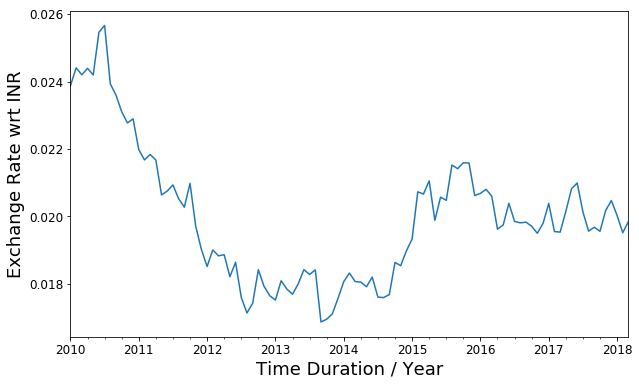

In [16]:
plot1 = df1['AUD'].plot(figsize=(10,6), fontsize=12)      # PLotting the graph for Australian Dollar wrt INR 
plot1.set_xlabel("Time Duration / Year", fontsize=18)     # given labes accordingly 
plot1.set_ylabel("Exchange Rate wrt INR", fontsize=18)

##### From above Line graph we can say that there was sudden rise in the conversion rate with respect to INR or in between AUD and INR. starting from the year 2010 the rate gone increasing till mid of 2014. In the coming years the rate had shown the drop in the same and keep on fluctuating  till date .


Desclaimer: The above inferences and predictions are made on the data available it may possible that in real the values may be different and the inference may false.

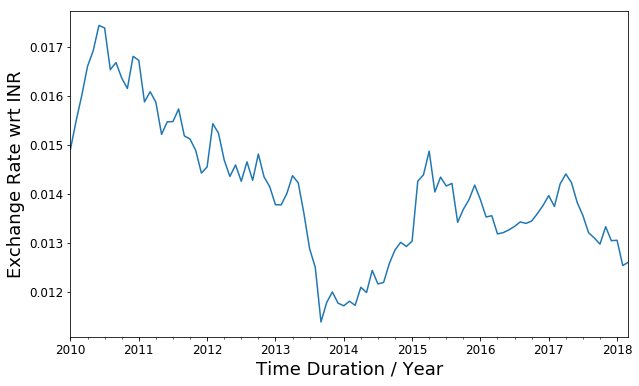

In [17]:
plot2 = df1['EUR'].plot(figsize=(10,6), fontsize=12)        # Plotting the graph for EUR to INR 
plot2.set_xlabel("Time Duration / Year", fontsize=18)
plot2.set_ylabel("Exchange Rate wrt INR", fontsize=18)

## Inference : 

From the above line graph we can predict that the exchange rate for INR to EUR was low in the starting month of the year 2010 as the time passes the rate goes on increasing and it suddenly goes up in the end of year of 2014, and after that it slowly decreases in the coming years. And lowers into starting month of year 2015 and 2017. from the pattern of the graph we can say that it may rise in the comming months of the year. 

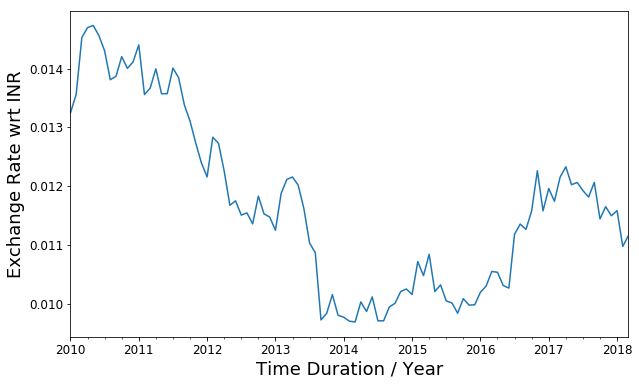

In [18]:
plot3 = df1['GBP'].plot(figsize=(10,6), fontsize=12)        # plot for GBP WRT to INR
plot3.set_xlabel("Time Duration / Year", fontsize=18)
plot3.set_ylabel("Exchange Rate wrt INR", fontsize=18)

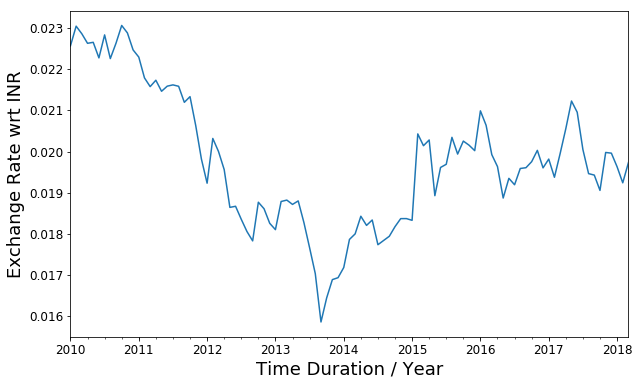

In [19]:
plot4 = df1['CAD'].plot(figsize=(10,6), fontsize=12)     # Plot for Canedian dollar to INR
plot4.set_xlabel("Time Duration / Year", fontsize=18)
plot4.set_ylabel("Exchange Rate wrt INR", fontsize=18)

# Inference :


By observing all the graphs we have found the same pattern for all the four currencies rate with respect to INR, this can infer that the due to some external factors(it may be any political or economical or anything further research can be done for this) the rate for all the four currencies have been increased in the year 2013 to 2014.   

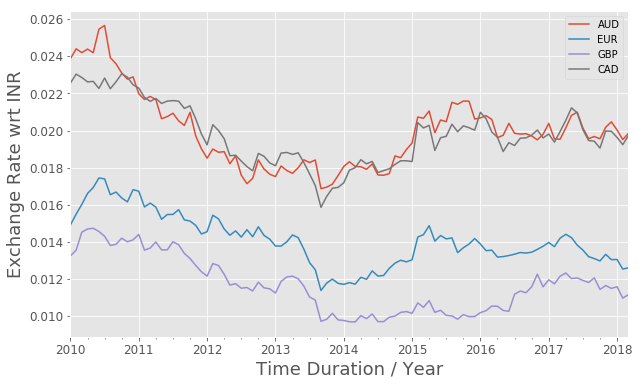

In [94]:
plot5 = df1[['AUD','EUR','GBP','CAD']].plot(figsize=(10,6), fontsize=12)
plot5.set_xlabel("Time Duration / Year", fontsize=18)
plot5.set_ylabel("Exchange Rate wrt INR", fontsize=18)

# Inference: 


From above multiline graph we can say that all show rise in the currency exchange rate with respect to INR. from all of the currencies GBP has highest currency exchange rate with respect to INR. 

As we can see in the graph there was gradual drop in GBP, since we can say one the reason for this is Brexit, since Brexit was referendum in the june 2016 so we can see the decreasing the GBP with respect to EUR. 

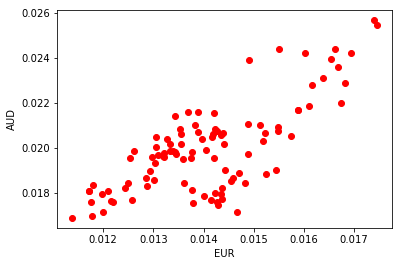

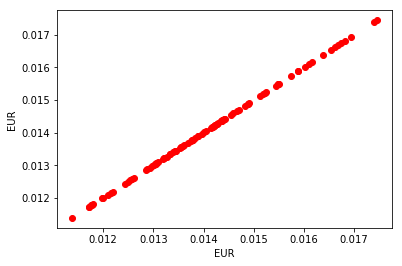

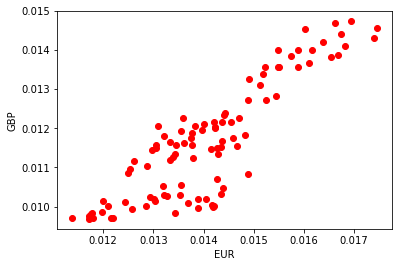

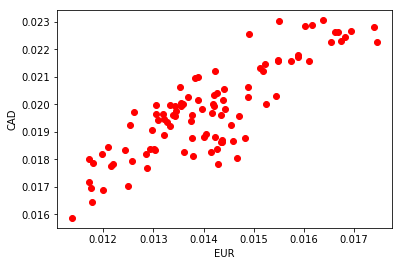

In [44]:
for i in limited_data:        # for loop for plotting the scatter plot against EUR to all other currencies  
    plt.figure()
    plt.plot(limited_data['EUR'],limited_data[i], "ro")
    plt.xlabel("EUR")
    plt.ylabel(i)

# Inference : 


The above graphs are scatter plots against EUR to all other currencies, since we already found that due to Brexit the GBP is going down, if we see the correlation between them it's a linear correlation, where as if we check for EUR to AUD its not liear one its scattered around.

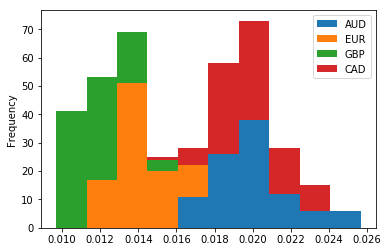

In [48]:
limited_data.plot.hist(stacked=True)

# Inference :


The above graph is histogram with stacked, it gives the frequency of the particular exchange rate for that currency, as we can see for GBP the most frequent rate was 0.014. 

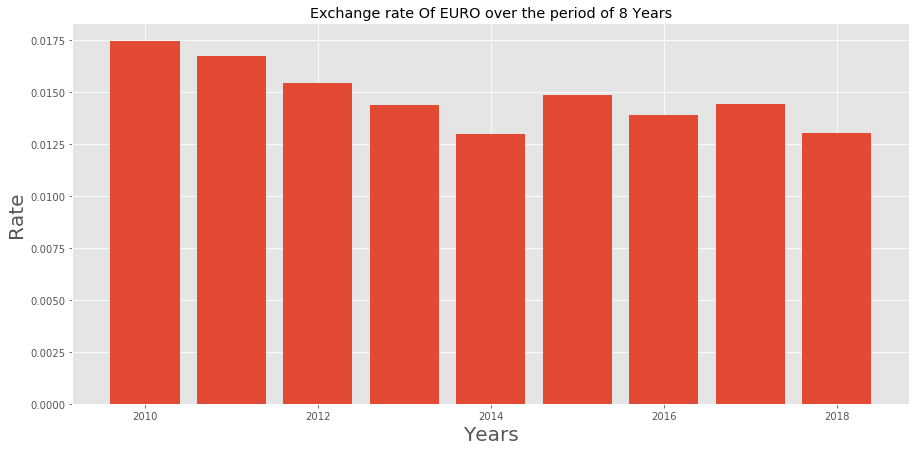

In [97]:
import matplotlib.dates as mdates                    # changing the date format

fig, plot8 = plt.subplots(figsize=(15,7))      
plot8.bar(limited_data.index.year, limited_data['EUR'])        # converted the timeseries data to year format 
plot8.set_title('Exchange rate Of EURO over the period of 8 Years')
plot8.set_xlabel('Years', fontsize=20)
plot8.set_ylabel('Rate', fontsize=20)

# Inference :


From above bar graph which is plotted for EURO which depicts the information over the 8 years period, from the graph we can say that the highest exchange rate was in the year 2014, where as the lowest was in the year 2010.

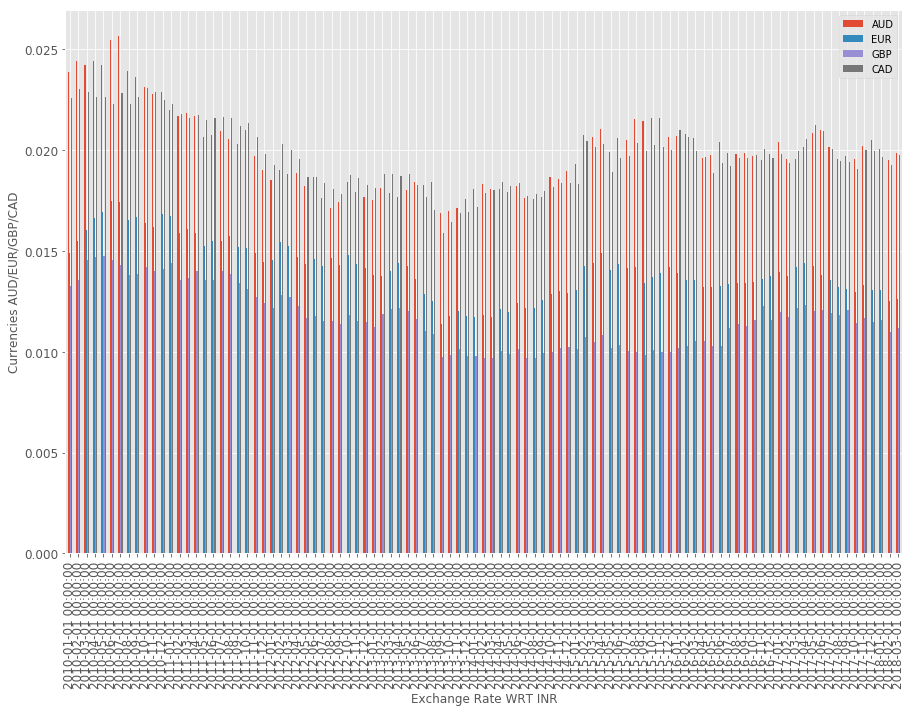

In [112]:
plot9 = limited_data.plot(kind='bar',figsize=(15,10), fontsize=12)  # plotting the multiline bar graph for the all currencies
plot9.set_xlabel('Exchange Rate WRT INR',fontsize=12)
plot9.set_ylabel('Currencies AUD/EUR/GBP/CAD',fontsize=12)


# Conclusion and Further Research:


The conclusions and inferences are given after every plots/graphs, So the if want to find out some more interesting patterns and information from the data further more studies need to be carried out. At this stage we have found the few patterns and interesting changes in the data which I have already explained under every grpah.

##### Desclaimer: The above inferences and predictions are made on the data available it may possible that in real the values may be different and the inference may false, its just made for study purpose and getting know the data.

# Refeneces :

[1] https://stackoverflow.com/questions

[2] https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/eurofxref-graph-inr.en.html

[3] https://www.youtube.com/results?search_query=how+to+parse+json+in+python

[4] https://python.gotrained.com/python-json-api-tutorial/

[5] https://github.com/akora/fixerio-python/blob/master/fixerIo.py

[6] https://fixer.io/documentation

[7] https://realpython.com/api-integration-in-python/

[8] https://docs.python.org/2/library/
